# 流量波动检测

In [1]:
# 读取数据
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')  # 创建解析列的功能对象
df = pd.read_table('./datacode_for_book/chapter4/time_series.txt', delimiter='\t', index_col='date', date_parser=date_parse)  # 读取数据
df[:3]
ts_data = df['number'].astype('float32')  # 将列转换为float32类型
ts_data.describe()  # 打印输出时间序列数据概况

,number
date,
1991-03-01,281
1991-03-02,304
1991-03-03,292


count    149.000000
mean     164.382553
std       75.097740
min       47.000000
25%      100.000000
50%      156.000000
75%      201.000000
max      400.000000
Name: number, dtype: float64

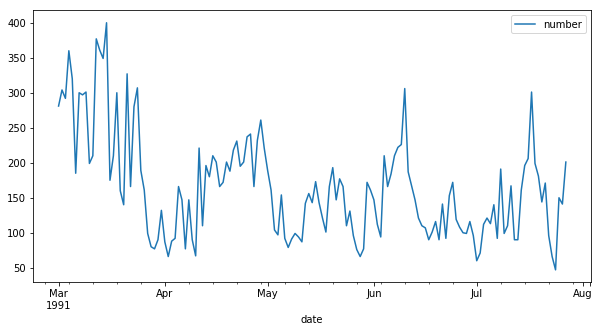

In [2]:
df.plot(figsize=(10,5))

In [3]:
#稳定性检测
'''
adf_test的返回值
Test statistic：代表检验统计量
p-value：代表p值检验的概率
Lags used：使用的滞后k，autolag=AIC时会自动选择滞后
Number of Observations Used：样本数量
Critical Value(5%) : 显著性水平为5%的临界值。
(1)假设是存在单位根，即不平稳；
(2)显著性水平，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。
(3)看P值和显著性水平a的大小，p值越小，小于显著性水平的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的
(4)看检验统计量和临界值，检验统计量小于临界值的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的
'''
from statsmodels.tsa.stattools import adfuller  # adf检验库
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['number'])
adf
pvalue
usedlag
nobs
critical_values
icbest
#adf值小于critical_values中的三个值，且P值小于0.01，则拒绝原假设（存在单位根，数据不稳定），认为数据稳定。

'\nadf_test的返回值\nTest statistic：代表检验统计量\np-value：代表p值检验的概率\nLags used：使用的滞后k，autolag=AIC时会自动选择滞后\nNumber of Observations Used：样本数量\nCritical Value(5%) : 显著性水平为5%的临界值。\n(1)假设是存在单位根，即不平稳；\n(2)显著性水平，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。\n(3)看P值和显著性水平a的大小，p值越小，小于显著性水平的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的\n(4)看检验统计量和临界值，检验统计量小于临界值的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的\n'

-3.7642778196383406

0.0032946903802968273

11

137

{'1%': -3.479007355368944,
 '5%': -2.8828782366015093,
 '10%': -2.5781488587564603}

1405.3846604574503

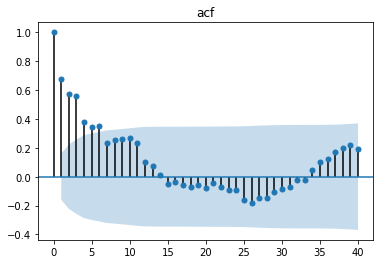

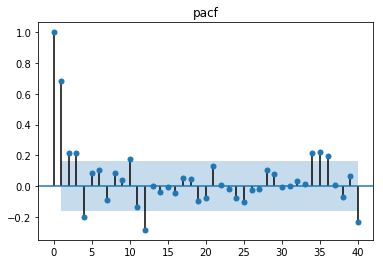

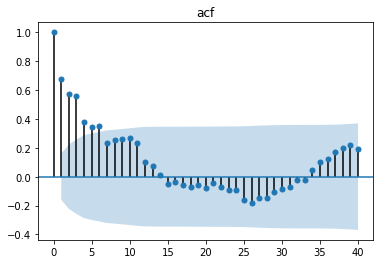

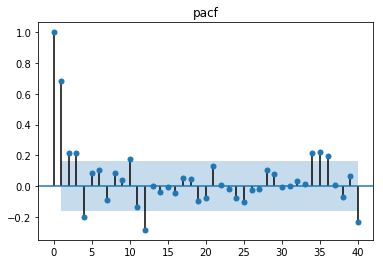

In [4]:
#自相关、偏相关曲线
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # acf和pacf展示库
plot_acf(df['number'], lags=40, title='acf')  # 自相关检测
plot_pacf(df['number'], lags=40, title='pacf')  # 偏相关检测

In [5]:
#白噪音检测

'''acorr_ljungbox(x, lags=None, boxpierce=False)函数检验无自相关
lags为延迟期数，如果为整数，则是包含在内的延迟期数，如果是一个列表或数组，那么所有时滞都包含在列表中最大的时滞中
boxpierce为True时表示除开返回LB统计量还会返回Box和Pierce的Q统计量
返回值：
lbvalue:测试的统计量
pvalue:基于卡方分布的p统计量
bpvalue:((optionsal), float or array) – test statistic for Box-Pierce test
bppvalue:((optional), float or array) – p-value based for Box-Pierce test on chi-square distribution
'''
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
lbvalue, pvalue = acorr_ljungbox(df['number'], lags=20)  # 白噪声检验结果
lbvalue, pvalue

'acorr_ljungbox(x, lags=None, boxpierce=False)函数检验无自相关\nlags为延迟期数，如果为整数，则是包含在内的延迟期数，如果是一个列表或数组，那么所有时滞都包含在列表中最大的时滞中\nboxpierce为True时表示除开返回LB统计量还会返回Box和Pierce的Q统计量\n返回值：\nlbvalue:测试的统计量\npvalue:基于卡方分布的p统计量\nbpvalue:((optionsal), float or array) – test statistic for Box-Pierce test\nbppvalue:((optional), float or array) – p-value based for Box-Pierce test on chi-square distribution\n'

(array([ 70.22298948, 120.88453858, 168.90419659, 190.88307984,
        209.62441028, 229.35916411, 238.21336143, 248.5308632 ,
        259.207545  , 270.78588472, 279.3969887 , 281.01780521,
        281.83956283, 281.87007792, 282.32172672, 282.56969134,
        283.08929145, 284.00830622, 284.60087407, 285.653256  ]),
 array([5.29655619e-17, 5.62672868e-27, 2.19396047e-36, 3.42397042e-40,
        2.47639330e-43, 1.04907420e-46, 8.91300423e-48, 3.52886217e-49,
        1.13268663e-50, 2.28396806e-52, 1.89817100e-53, 4.49486288e-53,
        1.50177353e-52, 7.05058202e-52, 2.60582826e-51, 1.02544479e-50,
        3.43489691e-50, 9.25252099e-50, 2.83068248e-49, 6.80385514e-49]))

In [6]:
from statsmodels.tsa.arima_model import ARMA  # ARMA库
max_count = int(len(df['number']) / 10)  # 最大循环次数最大定义为记录数的10%
bic = float('inf')  # 初始值为正无穷
tmp_score = []  # 临时p、q、aic、bic和hqic的值的列表
for tmp_p in range(max_count + 1):  # p循环max_count+1次
    for tmp_q in range(max_count + 1):  # q循环max_count+1次
        model = ARMA(df['number'], order=(tmp_p, tmp_q),freq='D')  # 创建ARMA模型对象
        try:
            results_ARMA = model.fit(disp=-1, method='css')  # ARMA模型训练
        except:
            continue  # 遇到报错继续
        finally:
            tmp_aic = results_ARMA.aic  # 模型的获得aic
            tmp_bic = results_ARMA.bic  # 模型的获得bic
            tmp_hqic = results_ARMA.hqic  # 模型的获得hqic
            tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])  # 追加每个模型的训练参数和结果
            if tmp_bic < bic:  # 如果模型bic小于最小值，那么获得最优模型ARMA的下列参数：
                p = tmp_p  # 最优模型ARMA的p值
                q = tmp_q  # 最优模型ARMA的q值
                model_arma = results_ARMA  # 最优模型ARMA的模型对象
                aic = tmp_bic  # 最优模型ARMA的aic
                bic = tmp_bic  # 最优模型ARMA的bic
                hqic = tmp_bic  # 最优模型ARMA的hqic
pdq_metrix = np.array(tmp_score)  # 将嵌套列表转换为矩阵
pdq_pd = pd.DataFrame(pdq_metrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])  # 基于矩阵创建数据框
pdq_pd

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed

,p,q,aic,bic,hqic
0,0.0,0.0,1712.839862,1718.847755,1715.280770
1,0.0,1.0,1653.446702,1662.458541,1657.108063
2,0.0,2.0,1648.868523,1660.884308,1653.750338
3,0.0,3.0,1618.676555,1633.696287,1624.778824
4,0.0,4.0,1619.720071,1637.743748,1627.042793
5,0.0,5.0,1619.720071,1637.743748,1627.042793
6,0.0,6.0,1601.914727,1625.946297,1611.678357
7,0.0,7.0,1603.490230,1630.525746,1614.474313
8,0.0,8.0,1603.310918,1633.350381,1615.515455
9,0.0,9.0,1605.309821,1638.353230,1618.734812


In [9]:
start = '1991-07-28'  # 设置预测开始的时间索引
end = '1991-08-02'  # 设置预测结束的时间索引
model_arma
model_arma.predict(start=start, end=end)

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'